# Advanced Data Analytics: regression

## Imports

In [1]:
!pip install ydata_profiling
!pip install sweetviz
!pip install phik

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=28a25520a39951421bfb6c7aa754a96304920329497120e4c38f26c6bba3300a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from phik import resources
from phik.report import plot_correlation_matrix

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

%matplotlib inline

Mounted at /content/drive


## Load data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/website_data.csv')

## Exploring data

In [4]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [5]:
df.shape

(2000, 7)

In [6]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [7]:
df.dtypes

,0
Page Views,int64
Session Duration,float64
Bounce Rate,float64
Traffic Source,object
Time on Page,float64
Previous Visits,int64
Conversion Rate,float64


## Target variable distribution, is it optimal?

<Axes: xlabel='Bounce Rate', ylabel='Count'>

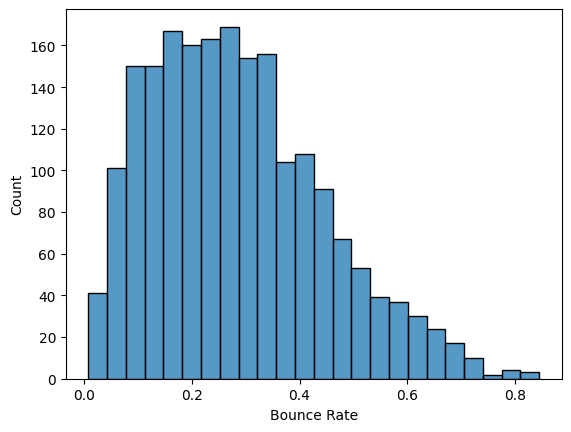

In [8]:
sns.histplot(df['Bounce Rate'])

The distribution looks slightly right-skewed. Most of the bounce rates fall between 0.2 and 0.4, with the bigggest concentration around 0.25. This suggests that a lot of users stay on the site for more than just a quick visit. However, there is a gradual decline in bounce rates as they increase, with fewer sessions showing bounce rates above 0.5. Only a small number of sessions have very high bounce rates close to 0.8, indicating that only a few users leave the site immediately without interacting much. Overall, the distribution is slightly skewed to the right, with the majority of sessions having relatively low bounce rates.

## Independent variable distributions, are they balanced throughout the datasets?

In [9]:
# We will use YData Profiling to generate a report

report = ProfileReport(df, title='Website data For Advanced Data Analytics')

report.to_notebook_iframe()

report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### General:

The dataset consists of 7 variables and 2000 observations, with no missing or duplicate data, ensuring it's complete and clean. Six of the variables are numeric, and one is categorical.

#### Page Views:

The Page Views variable has a mean of 4.95, with values ranging from 0 to 14. There are 14 zeros (0.7% of the data), and no negative or infinite values. With only 15 distinct values (0.8% distinct), this suggests that the distribution is somewhat limited and may not be perfectly balanced, as many observations could share the same values. However, the range and non-zero values indicate some variation. Overall, there is a pretty good normal distribution.

#### Session Duration:

The Session Duration variable is a continuous real number with 2000 unique values, indicating that every observation has a distinct duration. The mean session duration is 3.02 units, with a range from 0.0036 to 20.29, and no missing, zero, or negative values. The variable is very right skewed. This could indicate an imbalance, with some sessions lasting much longer than others.

#### Traffic Source:

The Traffic Source variable has 5 different categories: Organic, Paid, Referral, Social, and Direct. The distribution isn’t perfectly balanced, with Organic traffic being the most common at 786 entries, while Direct traffic is the least with 216 entries. The other categories (Paid, Referral, and Social) fall somewhere in the middle. While it’s not hugely uneven, the higher amount of Organic traffic compared to Direct might influence the model's predictions, depending on how important this variable is.


#### Time on Page

The Time on Page variable is continuous, with unique values for all 2000 observations, meaning every entry is distinct. It has a mean of 4.03 minutes, ranging from a minimum of 0.07 minutes to a maximum of 24.8 minutes. There are no missing, zero, or negative values, indicating the data is complete and valid. The distribution is right skewed. This uniqueness might indicate varying user engagement across sessions.

#### Previous Visits

The variable Previous Visits is a continuous numeric feature with a mean of 1.98, ranging from a minimum of 0 to a maximum of 9. It has 10 distinct values, with 14.1% of the observations being zeros (representing users with no previous visits). Since a significant portion of the dataset has zero previous visits, this variable may be somewhat imbalanced. The presence of mostly low values indicates that while some users return to the site multiple times, many are first-time visitors, suggesting that the distribution of Previous Visits is not entirely balanced across the dataset.

#### Conversion Rate

The Conversion Rate variable in the dataset displays a significant concentration of values near 1, indicating that most observations have high conversion rates. With 228 distinct values, this accounts for only 11.4% of the possible variations, suggesting a lack of diversity in the data. The mean conversion rate is approximately 0.98, with a minimum of 0.34 and a maximum of 1, showing that while there are some lower rates, the overwhelming majority of the data is clustered at the high end.

As for the independent variable distributions, they are not balanced throughout the dataset. The strong spike around 1 in the histogram suggests that most observations are skewed towards high conversion rates, leaving fewer instances of mid-range and low conversion rates. This imbalance may affect the model's ability to generalize, especially if it encounters more diverse scenarios in real-world applications.

## Overlapping data and noise, are any variables messy (lots of outliers etc.) or do they have contradicting trends, that might be non-optimal or confusing for the targer-variable?

#### Overlapping (**YData-profiling**):

- when looking at the histograms of the different variablesm (except bounce rate) we don't see multiple peaks per plot.
- When looking at the correlation matrix, normally hight correlations can mean overlap or redundancy. Eventhough we see some correlations aroun 0.5, that doesn't mean there is necessarliy overlapping.

## Redundancy, are there any variables that probably could be removed due to redundant information?

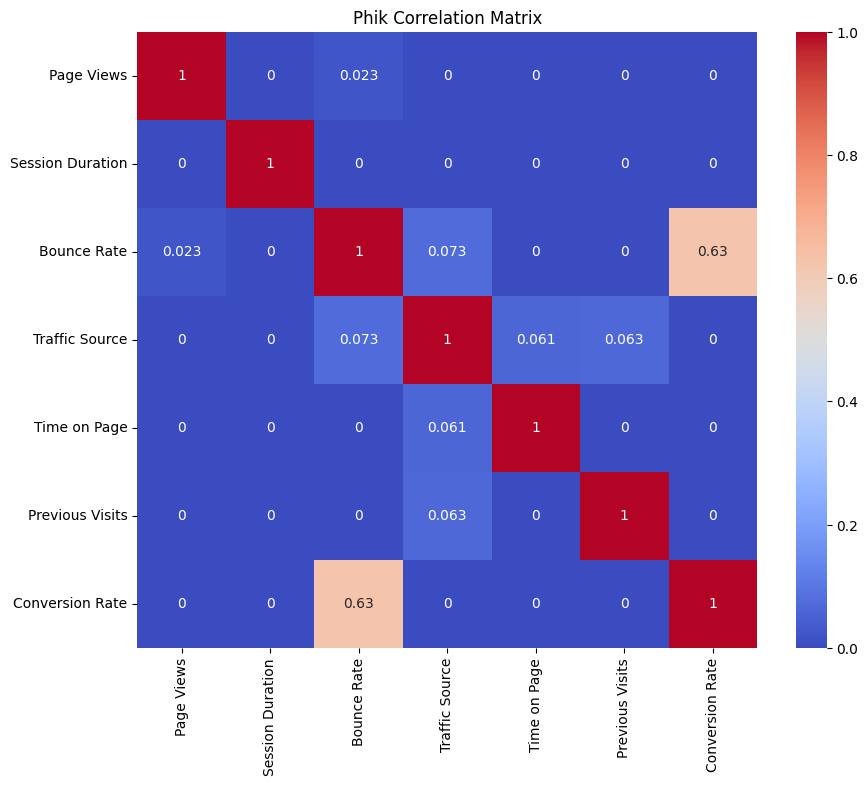

In [12]:
interval_cols = ['Bounce Rate', 'Session Duration', 'Time on Page']

phik_matrix = df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Phik Correlation Matrix')
plt.show()


### Redundancy:

The Phik correlation matrix shows us that most variables have very low correlations, showing little to no redundancy. However, Bounce Rate and Conversion Rate show a moderate correlation (Phik = 0.63), suggesting some overlap in the information they provide. If reducing dimensionality is important, one of these two could potentially be removed, but this decision should consider their specific importance to the analysis. Other variables (Page Views, Session Duration, Traffic Source, etc.) show no significant redundancy and likely offer unique insights.

## Other problems in the dataset, like missing data and duplicate rows?

We will try to use Sweetviz for this

In [13]:
report = sv.analyze(df)
report.show_html('sv_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



The dataset does not have any missing data or duplicate rows, we derived this information from Sweetviz:

- Missing Data: There are no missing values across any of the features.
- Duplicates: The dataset contains 2,000 unique rows, and there are 0 duplicates.

No issues with missing data or duplicate rows are present, ensuring a clean dataset for analysis.

Something that may be an issue is the fact that Page Views, Previous Visits and Traffic Source have few distinct values --> limited predictive power!

In [14]:
# Another way of looking for duplicate rows

duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Let us see what Autoviz has for us

In [15]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [16]:
from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()

av.AutoViz(pd.read_csv('/content/drive/MyDrive/Data/website_data.csv'))

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (2000, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Page Views,int64,0.000000,0,0.000000,14.000000,Column has 21 outliers greater than upper bound (10.50) or lower than lower bound(-1.50). Cap them or remove them.
Session Duration,float64,0.000000,NA,0.003613,20.290516,Column has 112 outliers greater than upper bound (9.27) or lower than lower bound(-4.26). Cap them or remove them.
Bounce Rate,float64,0.000000,NA,0.007868,0.844939,Column has 13 outliers greater than upper bound (0.73) or lower than lower bound(-0.18). Cap them or remove them.
Traffic Source,object,0.000000,0,,,No issue
Time on Page,float64,0.000000,NA,0.068515,24.796182,Column has 64 outliers greater than upper bound (10.63) or lower than lower bound(-3.28). Cap them or remove them.
Previous Visits,int64,0.000000,0,0.000000,9.000000,Column has 13 outliers greater than upper bound (6.00) or lower than lower bound(-2.00). Cap them or remove them.
Conversion Rate,float64,0.000000,NA,0.343665,1.000000,Column has 227 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.


Number of All Scatter Plots = 10
All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


So, in contradiction to what I thought I learned from YData-profiling, Autoviz tells us that we have some significant outliers in certain variables. Even in amounts that exceed upper bounds.

There are some things we can do about outliers:
- Capping: replacing the outlier with e certain upper or lower bound when it exceeds that bound
- Removal
- Transformation
- Imputation

All of the above methods have their own uses in specific situations. So depending on the situation of the variable, one should be chosen.